In [1]:
!pip install rasterio


     |████████████████████████████████| 19.3MB 1.4MB/s 


In [36]:
import glob
import numpy as np
import rasterio as rio
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib import cm
from pathlib import Path

from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

from sklearn.model_selection import RandomizedSearchCV
import os

# Import Data

In [3]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
root = "../data"

In [192]:
# fire = glob('../Data/fire/*.tif')
##v fire = glob(os.path.join(root, "fire", '*.tif'))
X = []
y = []
##v for i in fire:
tif_files = Path("../data/fire").glob("*.tif")
for i in tif_files:
    print(i)
    with rio.open(i, 'r') as f:
        X.append(f.read(1))
    y.append(1)

../data/fire/fire_1268.tif
../data/fire/fire_1532.tif
../data/fire/fire_1254.tif
../data/fire/fire_1240.tif
../data/fire/fire_1526.tif
../data/fire/fire_449.tif
../data/fire/fire_313.tif
../data/fire/fire_1297.tif
../data/fire/fire_475.tif
../data/fire/fire_1283.tif
../data/fire/fire_461.tif
../data/fire/fire_307.tif
../data/fire/fire_850.tif
../data/fire/fire_688.tif
../data/fire/fire_1718.tif
../data/fire/fire_844.tif
../data/fire/fire_1056.tif
../data/fire/fire_1730.tif
../data/fire/fire_1724.tif
../data/fire/fire_878.tif
../data/fire/fire_1042.tif
../data/fire/fire_893.tif
../data/fire/fire_1917.tif
../data/fire/fire_139.tif
../data/fire/fire_1903.tif
../data/fire/fire_887.tif
../data/fire/fire_677.tif
../data/fire/fire_1095.tif
../data/fire/fire_111.tif
../data/fire/fire_105.tif
../data/fire/fire_663.tif
../data/fire/fire_1081.tif
../data/fire/fire_924.tif
../data/fire/fire_1678.tif
../data/fire/fire_930.tif
../data/fire/fire_918.tif
../data/fire/fire_1122.tif
../data/fire/fire_16

../data/fire/fire_1045.tif
../data/fire/fire_328.tif
../data/fire/fire_314.tif
../data/fire/fire_472.tif
../data/fire/fire_1290.tif
../data/fire/fire_466.tif
../data/fire/fire_1284.tif
../data/fire/fire_300.tif
../data/fire/fire_1509.tif
../data/fire/fire_499.tif
../data/fire/fire_1535.tif
../data/fire/fire_1253.tif
../data/fire/fire_1247.tif
../data/fire/fire_1521.tif
../data/fire/fire_1251.tif
../data/fire/fire_1537.tif
../data/fire/fire_1523.tif
../data/fire/fire_1245.tif
../data/fire/fire_1279.tif
../data/fire/fire_1292.tif
../data/fire/fire_470.tif
../data/fire/fire_316.tif
../data/fire/fire_302.tif
../data/fire/fire_1286.tif
../data/fire/fire_464.tif
../data/fire/fire_458.tif
../data/fire/fire_1735.tif
../data/fire/fire_1053.tif
../data/fire/fire_869.tif
../data/fire/fire_1047.tif
../data/fire/fire_1721.tif
../data/fire/fire_1709.tif
../data/fire/fire_855.tif
../data/fire/fire_841.tif
../data/fire/fire_699.tif
../data/fire/fire_114.tif
../data/fire/fire_672.tif
../data/fire/fire_

../data/fire/fire_602.tif
../data/fire/fire_0.tif
../data/fire/fire_158.tif
../data/fire/fire_1037.tif
../data/fire/fire_1751.tif
../data/fire/fire_1745.tif
../data/fire/fire_819.tif
../data/fire/fire_1023.tif
../data/fire/fire_831.tif
../data/fire/fire_1779.tif
../data/fire/fire_825.tif
../data/fire/fire_1590.tif
../data/fire/fire_372.tif
../data/fire/fire_414.tif
../data/fire/fire_400.tif
../data/fire/fire_1584.tif
../data/fire/fire_366.tif
../data/fire/fire_428.tif
../data/fire/fire_1553.tif
../data/fire/fire_1235.tif
../data/fire/fire_1221.tif
../data/fire/fire_1547.tif
../data/fire/fire_1209.tif
../data/fire/fire_399.tif
../data/fire/fire_1543.tif
../data/fire/fire_1225.tif
../data/fire/fire_1231.tif
../data/fire/fire_1557.tif
../data/fire/fire_1219.tif
../data/fire/fire_389.tif
../data/fire/fire_362.tif
../data/fire/fire_1580.tif
../data/fire/fire_404.tif
../data/fire/fire_410.tif
../data/fire/fire_376.tif
../data/fire/fire_1594.tif
../data/fire/fire_438.tif
../data/fire/fire_102

../data/fire/fire_1029.tif
../data/fire/fire_344.tif
../data/fire/fire_422.tif
../data/fire/fire_436.tif
../data/fire/fire_350.tif
../data/fire/fire_378.tif
../data/fire/fire_387.tif
../data/fire/fire_1565.tif
../data/fire/fire_1203.tif
../data/fire/fire_1217.tif
../data/fire/fire_393.tif
../data/fire/fire_1571.tif
../data/fire/fire_1559.tif
../data/fire/fire_1229.tif
../data/fire/fire_1201.tif
../data/fire/fire_1567.tif
../data/fire/fire_385.tif
../data/fire/fire_1573.tif
../data/fire/fire_391.tif
../data/fire/fire_1215.tif
../data/fire/fire_1598.tif
../data/fire/fire_408.tif
../data/fire/fire_420.tif
../data/fire/fire_346.tif
../data/fire/fire_352.tif
../data/fire/fire_434.tif
../data/fire/fire_1759.tif
../data/fire/fire_805.tif
../data/fire/fire_811.tif
../data/fire/fire_187.tif
../data/fire/fire_1765.tif
../data/fire/fire_839.tif
../data/fire/fire_1003.tif
../data/fire/fire_1017.tif
../data/fire/fire_193.tif
../data/fire/fire_1771.tif
../data/fire/fire_178.tif
../data/fire/fire_8.t

../data/fire/fire_779.tif
../data/fire/fire_1825.tif
../data/fire/fire_751.tif
../data/fire/fire_989.tif
../data/fire/fire_745.tif
../data/fire/fire_1819.tif
../data/fire/fire_976.tif
../data/fire/fire_1158.tif
../data/fire/fire_962.tif
../data/fire/fire_1616.tif
../data/fire/fire_1170.tif
../data/fire/fire_792.tif
../data/fire/fire_1164.tif
../data/fire/fire_786.tif
../data/fire/fire_1602.tif
../data/fire/fire_619.tif
../data/fire/fire_1789.tif
../data/fire/fire_143.tif
../data/fire/fire_625.tif
../data/fire/fire_631.tif
../data/fire/fire_157.tif
../data/fire/fire_1038.tif
../data/fire/fire_802.tif
../data/fire/fire_816.tif
../data/fire/fire_1762.tif
../data/fire/fire_180.tif
../data/fire/fire_1004.tif
../data/fire/fire_1010.tif
../data/fire/fire_1776.tif
../data/fire/fire_194.tif
../data/fire/fire_369.tif
../data/fire/fire_427.tif
../data/fire/fire_341.tif
../data/fire/fire_355.tif
../data/fire/fire_433.tif
../data/fire/fire_1548.tif
../data/fire/fire_1206.tif
../data/fire/fire_382.t

../data/fire/fire_1689.tif
../data/fire/fire_1851.tif
../data/fire/fire_725.tif
../data/fire/fire_1879.tif
../data/fire/fire_731.tif
../data/fire/fire_902.tif
../data/fire/fire_1138.tif
../data/fire/fire_1886.tif
../data/fire/fire_1892.tif
../data/fire/fire_916.tif
../data/fire/fire_1104.tif
../data/fire/fire_1662.tif
../data/fire/fire_1676.tif
../data/fire/fire_1110.tif
../data/fire/fire_1925.tif
../data/fire/fire_679.tif
../data/fire/fire_889.tif
../data/fire/fire_651.tif
../data/fire/fire_137.tif
../data/fire/fire_123.tif
../data/fire/fire_1919.tif
../data/fire/fire_645.tif
../data/fire/fire_876.tif
../data/fire/fire_862.tif
../data/fire/fire_1058.tif
../data/fire/fire_692.tif
../data/fire/fire_1070.tif
../data/fire/fire_1716.tif
../data/fire/fire_1702.tif
../data/fire/fire_686.tif
../data/fire/fire_1064.tif
../data/fire/fire_309.tif
../data/fire/fire_1299.tif
../data/fire/fire_335.tif
../data/fire/fire_453.tif
../data/fire/fire_447.tif
../data/fire/fire_321.tif
../data/fire/fire_15

In [193]:
# nofire = glob('../Data/nofire/*.tif')
##v nofire = glob(os.path.join(root, "nofire", '*.tif'))
##v for i in nofire:
tif_files = Path("../data/nofire").glob("*.tif")
for i in tif_files:
    print(i)
    with rio.open(i, 'r') as f:
        X.append(f.read(1))
    y.append(0)

../data/nofire/nofire_440.tif
../data/nofire/nofire_326.tif
../data/nofire/nofire_332.tif
../data/nofire/nofire_454.tif
../data/nofire/nofire_468.tif
../data/nofire/nofire_483.tif
../data/nofire/nofire_497.tif
../data/nofire/nofire_1039.tif
../data/nofire/nofire_1011.tif
../data/nofire/nofire_1005.tif
../data/nofire/nofire_124.tif
../data/nofire/nofire_642.tif
../data/nofire/nofire_656.tif
../data/nofire/nofire_130.tif
../data/nofire/nofire_118.tif
../data/nofire/nofire_1549.tif
../data/nofire/nofire_859.tif
../data/nofire/nofire_681.tif
../data/nofire/nofire_695.tif
../data/nofire/nofire_1575.tif
../data/nofire/nofire_1213.tif
../data/nofire/nofire_865.tif
../data/nofire/nofire_871.tif
../data/nofire/nofire_1207.tif
../data/nofire/nofire_1561.tif
../data/nofire/nofire_1398.tif
../data/nofire/nofire_736.tif
../data/nofire/nofire_722.tif
../data/nofire/nofire_939.tif
../data/nofire/nofire_1429.tif
../data/nofire/nofire_1401.tif
../data/nofire/nofire_1367.tif
../data/nofire/nofire_911.ti

../data/nofire/nofire_1202.tif
../data/nofire/nofire_684.tif
../data/nofire/nofire_1558.tif
../data/nofire/nofire_848.tif
../data/nofire/nofire_690.tif
../data/nofire/nofire_733.tif
../data/nofire/nofire_727.tif
../data/nofire/nofire_1389.tif
../data/nofire/nofire_1362.tif
../data/nofire/nofire_914.tif
../data/nofire/nofire_1404.tif
../data/nofire/nofire_1410.tif
../data/nofire/nofire_900.tif
../data/nofire/nofire_1376.tif
../data/nofire/nofire_928.tif
../data/nofire/nofire_1438.tif
../data/nofire/nofire_519.tif
../data/nofire/nofire_257.tif
../data/nofire/nofire_531.tif
../data/nofire/nofire_525.tif
../data/nofire/nofire_243.tif
../data/nofire/nofire_1160.tif
../data/nofire/nofire_1174.tif
../data/nofire/nofire_15.tif
../data/nofire/nofire_294.tif
../data/nofire/nofire_1148.tif
../data/nofire/nofire_29.tif
../data/nofire/nofire_280.tif
../data/nofire/nofire_1149.tif
../data/nofire/nofire_281.tif
../data/nofire/nofire_28.tif
../data/nofire/nofire_295.tif
../data/nofire/nofire_1175.tif


../data/nofire/nofire_196.tif
../data/nofire/nofire_828.tif
../data/nofire/nofire_182.tif
../data/nofire/nofire_747.tif
../data/nofire/nofire_753.tif
../data/nofire/nofire_1470.tif
../data/nofire/nofire_1316.tif
../data/nofire/nofire_960.tif
../data/nofire/nofire_974.tif
../data/nofire/nofire_1302.tif
../data/nofire/nofire_1464.tif
../data/nofire/nofire_784.tif
../data/nofire/nofire_790.tif
../data/nofire/nofire_948.tif
../data/nofire/nofire_1458.tif
../data/nofire/nofire_579.tif
../data/nofire/nofire_545.tif
../data/nofire/nofire_223.tif
../data/nofire/nofire_237.tif
../data/nofire/nofire_551.tif
../data/nofire/nofire_7.tif
../data/nofire/nofire_1114.tif
../data/nofire/nofire_75.tif
../data/nofire/nofire_61.tif
../data/nofire/nofire_1100.tif
../data/nofire/nofire_1128.tif
../data/nofire/nofire_586.tif
../data/nofire/nofire_49.tif
../data/nofire/nofire_592.tif
../data/nofire/nofire_593.tif
../data/nofire/nofire_587.tif
../data/nofire/nofire_1129.tif
../data/nofire/nofire_48.tif
../data

../data/nofire/nofire_1508.tif
../data/nofire/nofire_818.tif
../data/nofire/nofire_830.tif
../data/nofire/nofire_1246.tif
../data/nofire/nofire_1520.tif
../data/nofire/nofire_1534.tif
../data/nofire/nofire_1252.tif
../data/nofire/nofire_824.tif
../data/nofire/nofire_763.tif
../data/nofire/nofire_777.tif
../data/nofire/nofire_987.tif
../data/nofire/nofire_1497.tif
../data/nofire/nofire_1483.tif
../data/nofire/nofire_993.tif
../data/nofire/nofire_978.tif
../data/nofire/nofire_1468.tif
../data/nofire/nofire_944.tif
../data/nofire/nofire_1332.tif
../data/nofire/nofire_1454.tif
../data/nofire/nofire_1440.tif
../data/nofire/nofire_1326.tif
../data/nofire/nofire_788.tif
../data/nofire/nofire_950.tif
../data/nofire/nofire_207.tif
../data/nofire/nofire_561.tif
../data/nofire/nofire_575.tif
../data/nofire/nofire_213.tif
../data/nofire/nofire_92.tif
../data/nofire/nofire_549.tif
../data/nofire/nofire_86.tif
../data/nofire/nofire_1118.tif
../data/nofire/nofire_79.tif
../data/nofire/nofire_51.tif
.

../data/nofire/nofire_844.tif
../data/nofire/nofire_1232.tif
../data/nofire/nofire_1226.tif
../data/nofire/nofire_850.tif
../data/nofire/nofire_688.tif
../data/nofire/nofire_1540.tif
../data/nofire/nofire_717.tif
../data/nofire/nofire_703.tif
../data/nofire/nofire_1385.tif
../data/nofire/nofire_1391.tif
../data/nofire/nofire_918.tif
../data/nofire/nofire_1408.tif
../data/nofire/nofire_1420.tif
../data/nofire/nofire_930.tif
../data/nofire/nofire_1346.tif
../data/nofire/nofire_1352.tif
../data/nofire/nofire_924.tif
../data/nofire/nofire_1434.tif
../data/nofire/nofire_515.tif
../data/nofire/nofire_273.tif
../data/nofire/nofire_267.tif
../data/nofire/nofire_501.tif
../data/nofire/nofire_529.tif
../data/nofire/nofire_1187.tif
../data/nofire/nofire_1193.tif
../data/nofire/nofire_1178.tif
../data/nofire/nofire_19.tif
../data/nofire/nofire_1144.tif
../data/nofire/nofire_25.tif
../data/nofire/nofire_31.tif
../data/nofire/nofire_298.tif
../data/nofire/nofire_1150.tif
../data/nofire/nofire_299.ti

../data/nofire/nofire_1169.tif
../data/nofire/nofire_1168.tif
../data/nofire/nofire_1154.tif
../data/nofire/nofire_35.tif
../data/nofire/nofire_21.tif
../data/nofire/nofire_288.tif
../data/nofire/nofire_1140.tif
../data/nofire/nofire_505.tif
../data/nofire/nofire_263.tif
../data/nofire/nofire_277.tif
../data/nofire/nofire_511.tif
../data/nofire/nofire_539.tif
../data/nofire/nofire_1197.tif
../data/nofire/nofire_1183.tif
../data/nofire/nofire_908.tif
../data/nofire/nofire_1418.tif
../data/nofire/nofire_1430.tif
../data/nofire/nofire_920.tif
../data/nofire/nofire_1356.tif
../data/nofire/nofire_1342.tif
../data/nofire/nofire_934.tif
../data/nofire/nofire_1424.tif
../data/nofire/nofire_707.tif
../data/nofire/nofire_713.tif
../data/nofire/nofire_1395.tif
../data/nofire/nofire_1381.tif
../data/nofire/nofire_1578.tif
../data/nofire/nofire_868.tif
../data/nofire/nofire_1544.tif
../data/nofire/nofire_854.tif
../data/nofire/nofire_1222.tif
../data/nofire/nofire_1236.tif
../data/nofire/nofire_698

[1111 1303 2663]


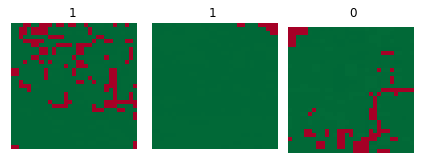

In [194]:
fig = plt.figure()

idx = np.random.randint(0,len(X),3)
print(idx)
j = 1
for i in idx:
    plt.subplot(1,3,j)
    masked_array = np.ma.masked_where(X[i] == 0, X[i])
    plt.imshow(masked_array, cmap = cm.RdYlGn)
    plt.title(y[i])
    plt.axis('off')
    j+=1

fig.tight_layout()
plt.show()

/var/folders/fn/wq493n8n30l6jf8c_l_k1p_00000gn/T/ipykernel_70731/1393207171.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


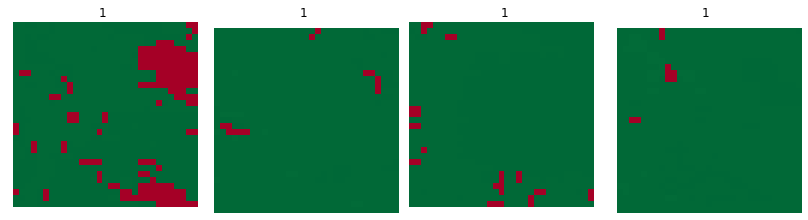

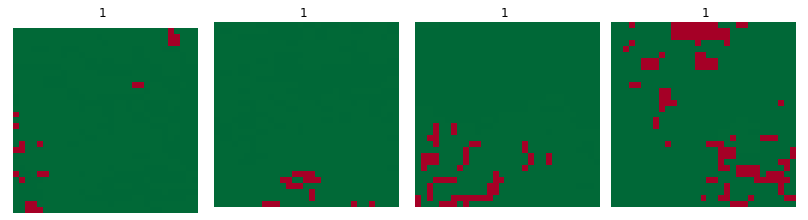

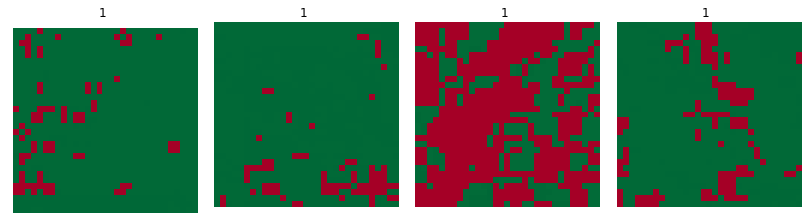

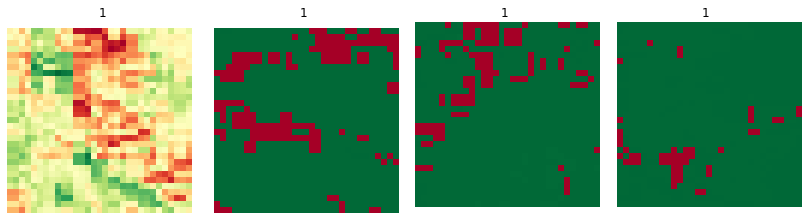

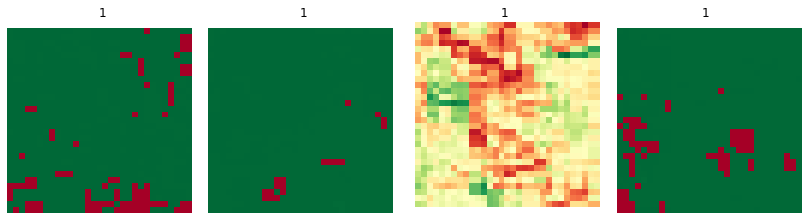

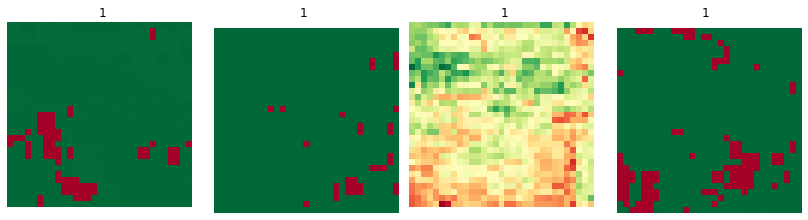

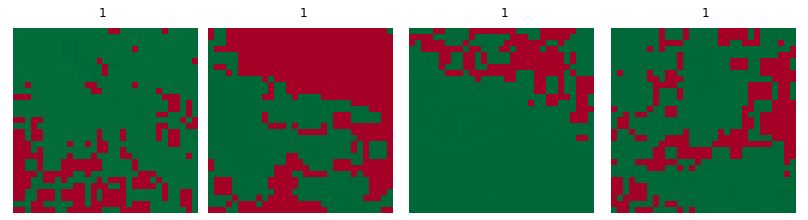

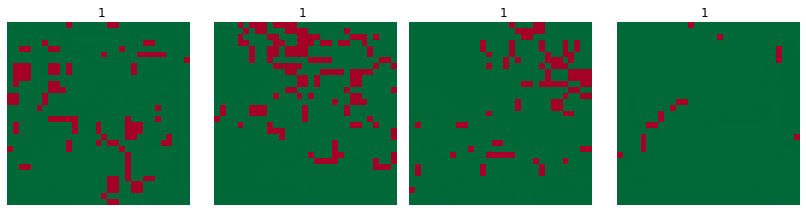

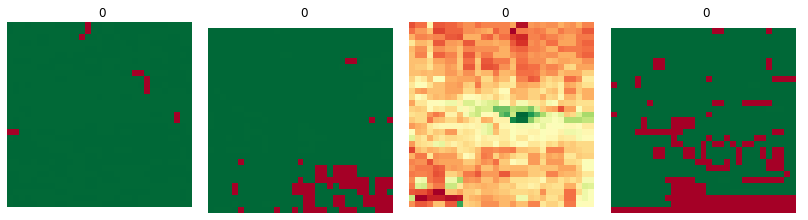

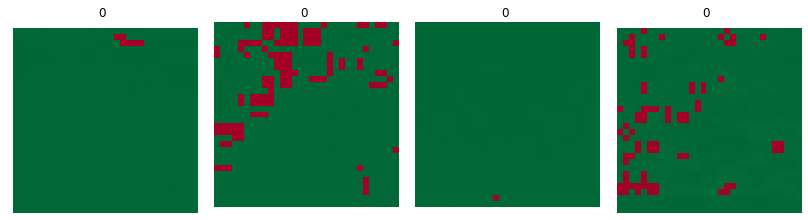

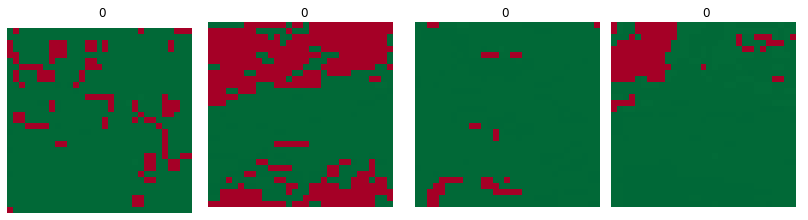

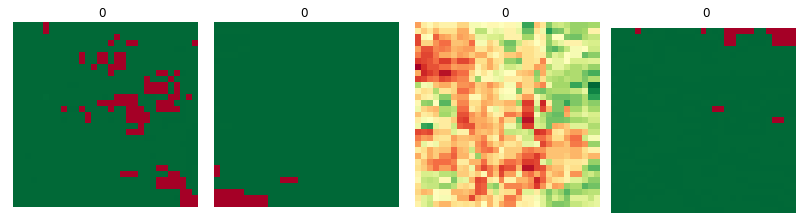

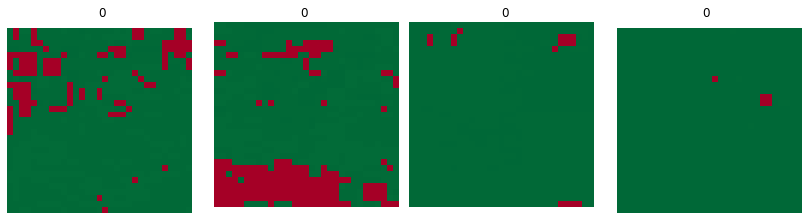

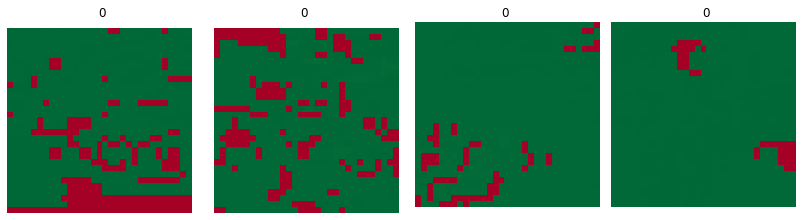

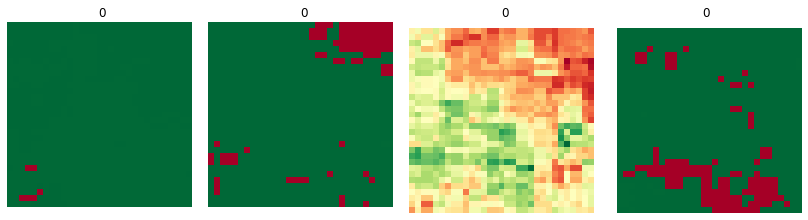

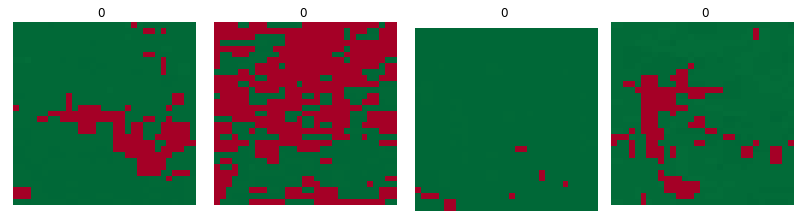

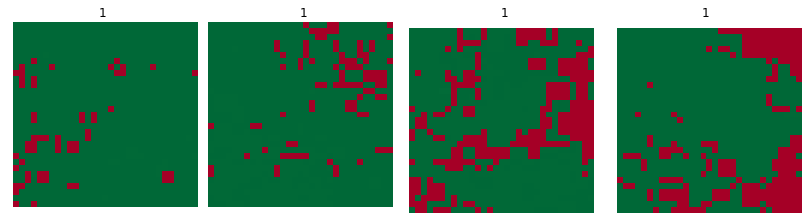

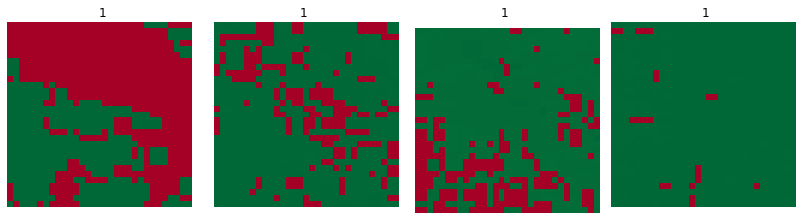

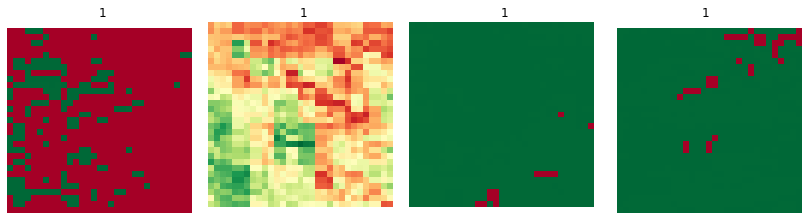

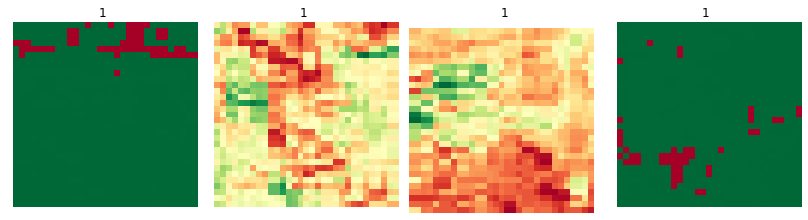

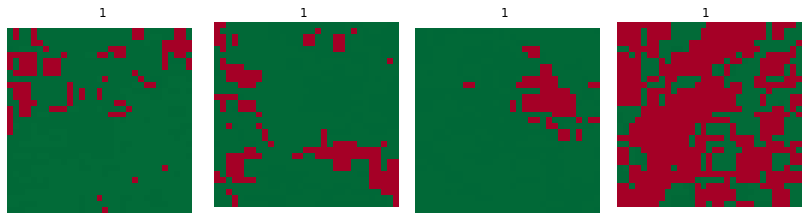

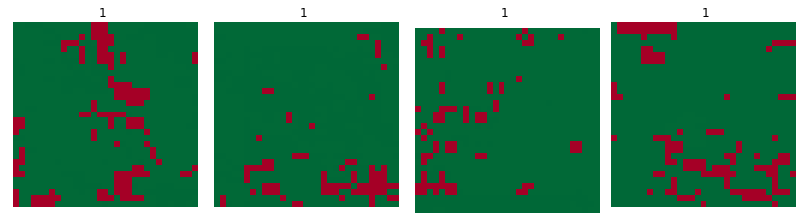

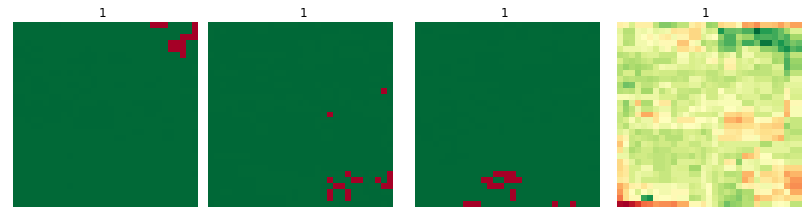

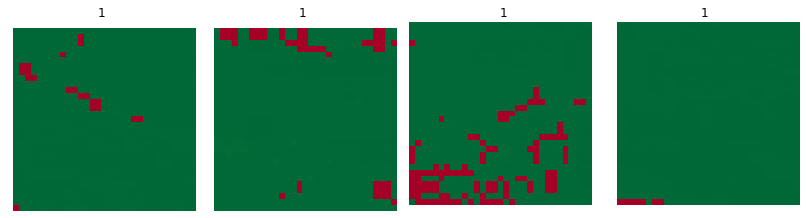

In [315]:
##vnew new ver of above
from matplotlib import gridspec

idx = np.random.randint(132,len(X),3)
## i = 1952
j = 4 ## columns
l = 8 ## rows
m = 1
k = 1 ## rows

for i in idx:
    for k in range(1,l+1):
        fig = plt.figure()
        for m in range(1,j+1):
            plt.subplot(k,8,m)
            ## print (k,m,i)
            masked_array = np.ma.masked_where(X[i] == 0, X[i])
            plt.imshow(masked_array, cmap = cm.RdYlGn)
            plt.title(y[i])
            plt.axis('off')
            i+=1
            m+=1
        k+=1
        m=1
        fig.set_size_inches(22.5, 22.5) ##new
        fig.tight_layout()
        fig.savefig('../savefig/to.png')
        plt.show
    

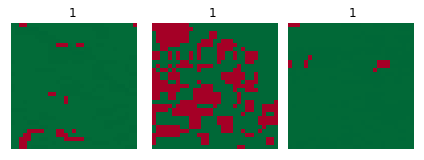

In [308]:
fig = plt.figure()

idx = np.random.randint(0,len(X), 3)

j = 1
for i in idx:
    plt.subplot(1,3,j)
    masked_array = np.ma.masked_where(X[i] == 0, X[i])
    plt.imshow(masked_array, cmap = cm.RdYlGn)
    plt.title(y[i])
    plt.axis('off')
    j+=1

fig.tight_layout()
plt.show()

In [294]:
# stack data
X = np.stack(X)
y = np.array(y)

In [296]:
# Flatten imamges
n_samples = X.shape[0]
X_data = X.reshape((n_samples, -1))

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X_data,y, test_size = 0.2, random_state = 42)
print('Training data and target sizes: \n{}, {}'.format(X_train.shape,y_train.shape))
print('Test data and target sizes: \n{}, {}'.format(X_test.shape,y_test.shape))

Training data and target sizes: 
(2822, 1024), (2822,)
Test data and target sizes: 
(706, 1024), (706,)


# kNN Classifier

The optimal number of neighbors is 7


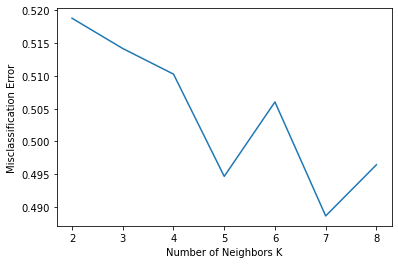

The Accuracy is 0.5014164305949008 



In [297]:
# Cross Validation to check best k
X_train, X_test, y_train, y_test = train_test_split(X_data,y, test_size = 0.2, random_state = 42)

neighbors = list(range(2,9,1))
cv_scores = []

for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, X_train, y_train, cv = 5, scoring = 'accuracy')
    cv_scores.append(scores.mean())

# Plot misclassification error
mse = [1 - x for x in cv_scores]

# determine the best k
optimal_k = neighbors[mse.index(min(mse))]
print("The optimal number of neighbors is {}".format(str(optimal_k)))

# plot misclassification error vs k
plt.figure()
plt.plot(neighbors, mse)
plt.xlabel("Number of Neighbors K")
plt.ylabel("Misclassification Error")
plt.show()

# Using the optimal_k predict the test test
KNN_model = KNeighborsClassifier(n_neighbors = optimal_k)
KNN_model.fit(X_train, y_train)

# Predict on the test set
KNN_result = metrics.accuracy_score(KNN_model.predict(X_test), y_test)
train_result = metrics.accuracy_score(KNN_model.predict(X_train), y_train)
print("The Accuracy is {} \n".format(str(KNN_result)))

Confusion matrix, without normalization
[[125 172]
 [180 229]]
Normalized confusion matrix
[[0.42 0.58]
 [0.44 0.56]]


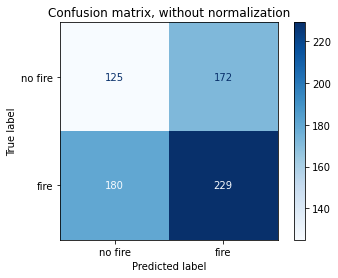

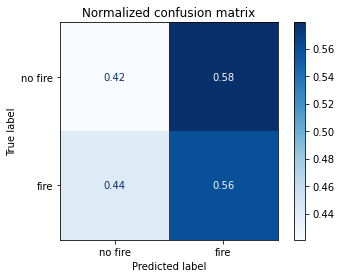

In [298]:
np.set_printoptions(precision=2)

class_names = ['no fire', 'fire']

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = metrics.plot_confusion_matrix(KNN_model, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

# SVM Classifier

In [299]:
def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    grid_search.best_params_
    return grid_search.best_params_

In [300]:
# Find best parameters
svm_param = svc_param_selection(X_train, y_train, 3)

# Fit model
svm_model = svm.SVC(kernel='rbf', gamma = svm_param['gamma'], C = svm_param['C'])
svm_model.fit(X_train, y_train)

print('Model train accuracy is',svm_model.score(X_train, y_train))
print('Model test accuracy is', svm_model.score(X_test, y_test))

Model train accuracy is 1.0
Model test accuracy is 0.6586402266288952


Confusion matrix, without normalization
[[297   0]
 [241 168]]
Normalized confusion matrix
[[1.   0.  ]
 [0.59 0.41]]


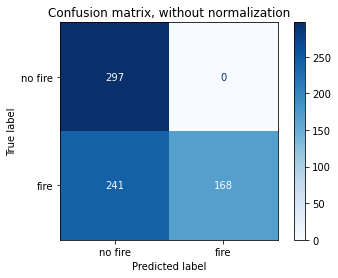

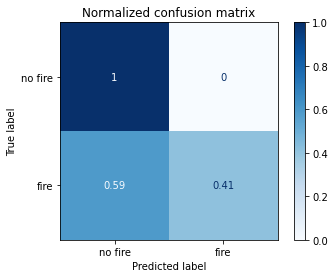

In [301]:
np.set_printoptions(precision=2)

class_names = ['no fire', 'fire']

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = metrics.plot_confusion_matrix(svm_model, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [302]:
svm_param

{'C': 1, 'gamma': 0.001}

In [303]:
# Predict labels for test data
svm_pred = svm_model.predict(X_test)

# Accuracy and Classification Reeport
print(f"Test Accuracy: {metrics.accuracy_score(y_test, svm_pred)*100}")
print(metrics.classification_report(y_test, svm_pred))

Test Accuracy: 65.86402266288952
              precision    recall  f1-score   support

           0       0.55      1.00      0.71       297
           1       1.00      0.41      0.58       409

    accuracy                           0.66       706
   macro avg       0.78      0.71      0.65       706
weighted avg       0.81      0.66      0.64       706



# Random Forest

In [304]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()

In [305]:
n_estimators = [100,300,500,800,1200]
max_depth = [5,8,15,25,30]
min_samples_split = [2,5,10,15,100]
min_samples_leaf = [1,2,5,10]

hyperF = dict(n_estimators = n_estimators,
             max_depth = max_depth,
             min_samples_split= min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(clf, hyperF, cv = 3, verbose = 1, n_jobs = -1)
bestF = gridF.fit(X_train, y_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


/Users/vpillari/virtualenvs/jupyter/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/vpillari/virtualenvs/jupyter/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/vpillari/virtualenvs/jupyter/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/vpillari/virtualenvs/jupyter/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (de

In [31]:
print(bestF.best_params_)

{'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 500}


In [32]:
# Predict labels for test data
rf_pred = bestF.predict(X_test)

# Accuracy and Classification Reeport
print(f"Accuracy: {metrics.accuracy_score(y_test, rf_pred)*100}")
print(metrics.classification_report(y_test, rf_pred))

Accuracy: 70.6798866855524
              precision    recall  f1-score   support

           0       0.66      0.62      0.64       297
           1       0.74      0.77      0.75       409

    accuracy                           0.71       706
   macro avg       0.70      0.69      0.70       706
weighted avg       0.70      0.71      0.71       706



Confusion matrix, without normalization
[[184 113]
 [ 94 315]]
Normalized confusion matrix
[[0.62 0.38]
 [0.23 0.77]]


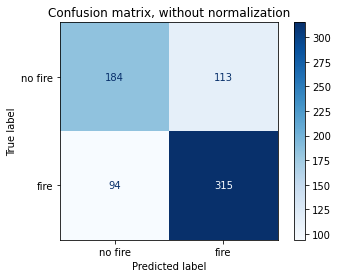

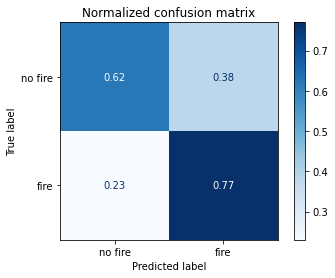

In [33]:
np.set_printoptions(precision=2)

class_names = ['no fire', 'fire']

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = metrics.plot_confusion_matrix(bestF, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

# 3 months: Random Forest

In [137]:
##v fire = glob(os.path.join(root, "3months_fire", '*.tif'))
X = []
y = []
##v for i in fire:
tif_files = Path("../data/3months_fire").glob("*.png")
for i in tif_files:
    with rio.open(i, 'r') as f:
        X.append(f.read())
    y.append(1)

In [138]:
##v nofire = glob(os.path.join(root, "3months_nofire", '*.tif'))
##v for i in nofire:
tif_files = Path("../data/3months_nofire").glob("*.png")
for i in tif_files:
    with rio.open(i, 'r') as f:
        X.append(f.read())
    y.append(0)

In [139]:
# stack data
X = np.stack(X)
y = np.array(y)

In [140]:
# Flatten imamges
n_samples = X.shape[0]
X_data = X.reshape((n_samples, -1))

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X_data,y, test_size = 0.2, random_state = 42)
print('Training data and target sizes: \n{}, {}'.format(X_train.shape,y_train.shape))
print('Test data and target sizes: \n{}, {}'.format(X_test.shape,y_test.shape))

Training data and target sizes: 
(2822, 3072), (2822,)
Test data and target sizes: 
(706, 3072), (706,)


In [142]:
clf = RandomForestClassifier(n_estimators = 500, max_depth = 25, min_samples_split = 5, min_samples_leaf = 2)
clf.fit(X_train, y_train)

# Predict labels for test data
rf_pred = clf.predict(X_test)

# Accuracy and Classification Reeport
print(f"Accuracy: {metrics.accuracy_score(y_test, rf_pred)*100}")
print(metrics.classification_report(y_test, rf_pred))

Accuracy: 72.23796033994334
              precision    recall  f1-score   support

           0       0.68      0.64      0.66       297
           1       0.75      0.78      0.77       409

    accuracy                           0.72       706
   macro avg       0.72      0.71      0.71       706
weighted avg       0.72      0.72      0.72       706



Confusion matrix, without normalization
[[190 107]
 [ 89 320]]
Normalized confusion matrix
[[0.64 0.36]
 [0.22 0.78]]


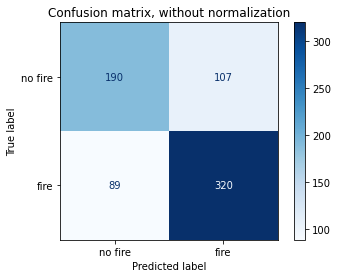

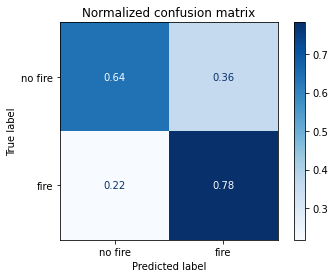

In [143]:
np.set_printoptions(precision=2)

class_names = ['no fire', 'fire']

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = metrics.plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [144]:
clf = RandomForestClassifier()
n_estimators = [100,300,500,800,1200]
max_depth = [5,8,15,25,30]
min_samples_split = [2,5,10,15,100]
min_samples_leaf = [1,2,5,10]

hyperF = dict(n_estimators = n_estimators,
             max_depth = max_depth,
             min_samples_split= min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(clf, hyperF, cv = 3, verbose = 1, n_jobs = -1)
bestF = gridF.fit(X_train, y_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


/Users/vpillari/virtualenvs/jupyter/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/vpillari/virtualenvs/jupyter/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/vpillari/virtualenvs/jupyter/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/vpillari/virtualenvs/jupyter/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (de

In [145]:
print(bestF.best_params_)

{'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 500}


In [146]:
# Predict labels for test data
rf_pred = bestF.predict(X_test)

# Accuracy and Classification Reeport
print(f"Accuracy: {metrics.accuracy_score(y_test, rf_pred)*100}")
print(metrics.classification_report(y_test, rf_pred))

Accuracy: 72.23796033994334
              precision    recall  f1-score   support

           0       0.69      0.61      0.65       297
           1       0.74      0.80      0.77       409

    accuracy                           0.72       706
   macro avg       0.72      0.71      0.71       706
weighted avg       0.72      0.72      0.72       706



Confusion matrix, without normalization
[[181 116]
 [ 80 329]]
Normalized confusion matrix
[[0.61 0.39]
 [0.2  0.8 ]]


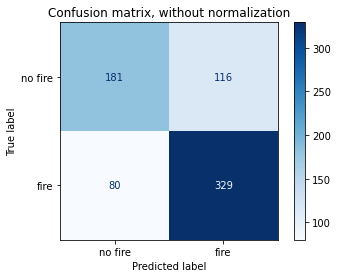

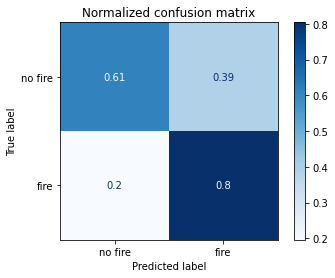

In [147]:
np.set_printoptions(precision=2)

class_names = ['no fire', 'fire']

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = metrics.plot_confusion_matrix(bestF, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()